In [ ]:
!pip install fastbook
!pip install gradio
!pip install fastai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 M

In [ ]:
from fastai.text.all import *
from fastai import *
import gradio as gr

In [ ]:
torch.cuda.is_available()

True

In [ ]:
path = untar_data(URLs.AMAZON_REVIEWS_POLARITY)

In [ ]:
train_df = pd.read_csv(path/'train.csv',header=None,names=['Polarity','Title','Review'],skiprows=(3450000))

In [ ]:
train_df.head()

,Polarity,Title,Review
0,2,Catnip for the human soul,Wonderfully entertaining! The short stories are the ideal length for passing the time while waiting at the vet's office (or doctor's office)! Well written with scripture that ties in nicely to each story. Cat lovers will easily identify with the different personalities of the feline. Great reading that leaves you feeling good!
1,1,Fell apart the first day I used it!!,Either way this was only $1.99 for the charger not a deal but I just went ahead and dealt with because it was so cheap!!! But just bought another one but it's a home charger might have better luck! I guess! lol But I would just reccommend the home charger instead of the car charger!
2,2,This is nice and wonderful,"I especially like this product. Also for a change since the manufacturer has a mail in rebate on this, I got this item (3 in fact) for free.- Koustubh, NY"
3,1,the best available products to kill bad mouth,"this products are very effective, killing bad mouth in just second. whenever you are ready for an interview or a conversation, do not forget to take one"
4,2,Great Stuff,This is a great portable mouthwash! I bought it for my girls in mind (they both have braces) and I like it too.


In [ ]:
valid_df = pd.read_csv(path/'test.csv',header=None,names=['Polarity','Title','Review'],skiprows=385000)
valid_df.head()

,Polarity,Title,Review
0,1,Hate it,This is the worst os ive ever used you can't hold down the button like windows and its exteremly hard to use you also cant get games for it
1,2,"THE ""FLATOUT"" BEST BEAR YOU CAN BUY",I LOVE THIS BEAR AS DOES MY SON. WHAT A NICE UNIQUE ENVIRONMENTALLY FRIENDLY TEDDY BEAR THAT WILL LAST A LIFETIME. IT IS MADE OF NATURAL MATERIAL NOT THE ICKY PLASTIC MATERIALS AVAILABLE IN DEPARTMENT STORES. IT IS SOFT TOO. A UNIQUE GIFT
2,2,Great pot,"This is a great stockpot. We use it for making relishes, apple sauce and other foods that have to be simmered without burning on the bottom of the pot. Does a perfect job."
3,1,keith Malley is not enough,the only scenes to look forward to in this movie are Keith Malley's scenes. There are not enough scenes in this movie to make this movie good. My roommates and I watched this movie and laughed but I don't think that's what the director intended. Keith Malley is great this movie is not.
4,1,Scary? What movie did those 5 Stars raters watch?,"This movie sucked - honestly was one of the worst movies I have seen...and I LIKE bad thrillers and horror movies. This movie pulled from so many others before it; no originality at all. The acting is subpar (the so called ""hotness"" of Tara is not enough to mask her terrible skills, sorry boys), and at only one time did I have to look away from the torture act. Even if you can get this for free at your library, I wouldn't waste your time."


In [ ]:
len(train_df)
len(valid_df)

15000

In [ ]:
df1 = pd.concat([train_df,valid_df],ignore_index=True)
df1['is_valid']=False
df1.loc[valid_df.index,'is_valid']=True
df1.head()

,Polarity,Title,Review,is_valid
0,2,Catnip for the human soul,Wonderfully entertaining! The short stories are the ideal length for passing the time while waiting at the vet's office (or doctor's office)! Well written with scripture that ties in nicely to each story. Cat lovers will easily identify with the different personalities of the feline. Great reading that leaves you feeling good!,True
1,1,Fell apart the first day I used it!!,Either way this was only $1.99 for the charger not a deal but I just went ahead and dealt with because it was so cheap!!! But just bought another one but it's a home charger might have better luck! I guess! lol But I would just reccommend the home charger instead of the car charger!,True
2,2,This is nice and wonderful,"I especially like this product. Also for a change since the manufacturer has a mail in rebate on this, I got this item (3 in fact) for free.- Koustubh, NY",True
3,1,the best available products to kill bad mouth,"this products are very effective, killing bad mouth in just second. whenever you are ready for an interview or a conversation, do not forget to take one",True
4,2,Great Stuff,This is a great portable mouthwash! I bought it for my girls in mind (they both have braces) and I like it too.,True


In [ ]:
dls = TextDataLoaders.from_df(df=df1,is_lm=True,text_col=2,label_col=0)
dls.show_batch()

,text,text_
0,"xxbos xxmaj the kitchenaid skillets are well built . xxmaj the non - stick coating is very effective and durable . xxmaj they heat up quickly and cook evenly . i would highly recomend them to anyone . xxbos xxmaj what a total xxup bummer xxrep 3 ! :( my little jack - a - bee xxup loves these xxmaj chicken xxmaj chips , but unfortunately they are made in xxmaj china","xxmaj the kitchenaid skillets are well built . xxmaj the non - stick coating is very effective and durable . xxmaj they heat up quickly and cook evenly . i would highly recomend them to anyone . xxbos xxmaj what a total xxup bummer xxrep 3 ! :( my little jack - a - bee xxup loves these xxmaj chicken xxmaj chips , but unfortunately they are made in xxmaj china ("
1,""" pop "" soul sensibilities in his arrangements , even in these early sets . xxmaj gigi xxmaj xxunk , on the other hand , takes the instrumental line - up and returns it to a brighter , harder - edged sound , more clearly in the "" east xxmaj coast "" hard - bop school . xxmaj the xxmaj jones tunes end up being the clear winners in this side -","pop "" soul sensibilities in his arrangements , even in these early sets . xxmaj gigi xxmaj xxunk , on the other hand , takes the instrumental line - up and returns it to a brighter , harder - edged sound , more clearly in the "" east xxmaj coast "" hard - bop school . xxmaj the xxmaj jones tunes end up being the clear winners in this side - by"
2,"battery from your laptop and keep it in your case for whenever you are traveling . xxmaj this is actually a stupid fix , because … if the power goes out while you are working on your computer , your battery is in your laptop bag ! xxmaj the fix is actually a new computer , that has more up - to - date software and hardware , that sense when the","from your laptop and keep it in your case for whenever you are traveling . xxmaj this is actually a stupid fix , because … if the power goes out while you are working on your computer , your battery is in your laptop bag ! xxmaj the fix is actually a new computer , that has more up - to - date software and hardware , that sense when the battery"
3,"machinations with lots of silliness to boot ! xxmaj it has a good moral to the story that is sweet . xxmaj this is just an example of the fun you 'll see in this xxunk enjoyable . xxmaj this is a series worth adding to your video library . xxbos xxmaj this tuner is very inconsistent . i followed the instructions exactly , had it so quiet in the house you","with lots of silliness to boot ! xxmaj it has a good moral to the story that is sweet . xxmaj this is just an example of the fun you 'll see in this xxunk enjoyable . xxmaj this is a series worth adding to your video library . xxbos xxmaj this tuner is very inconsistent . i followed the instructions exactly , had it so quiet in the house you could"
4,", so i do n't think this is just me . xxmaj i 'll be returning it . xxbos a new 64 bit xxup amd processor with 1 xxmaj gig of xxup ram ca n't run this hog . xxmaj thought dial up was slow ? xxmaj get a whole new meaning of slow and buy this product . xxmaj customer service is good enough to warrant another star in the rating",so i do n't think this is just me . xxmaj i 'll be returning it . xxbos a new 64 bit xxup amd processor with 1 xxmaj gig of xxup ram ca n't run this hog . xxmaj thought dial up was slow ? xxmaj get a whole new meaning of slow and buy this product . xxmaj customer service is good enough to warrant another star in the rating .
5,"the xxmaj rescue xxmaj heroes xxmaj dune xxmaj buggy and xxmaj xxunk vehicle . xxmaj this one just seems like too much "" hype "" for the money . xxbos xxmaj this is definitely the best xxup rts game around . xxmaj unlike all other xxup rts ' , this game provides you with 3 different races - and i mean xxup different . xxmaj most xxup rts ' provide many races","xxmaj rescue xxmaj heroes xxmaj dune xxmaj buggy and xxmaj xxunk vehicle . xxmaj this one just seems like too mu

In [ ]:
learn = language_model_learner(dls,AWD_LSTM,drop_mult=0.3,metrics=[accuracy,Perplexity()]).to_fp16()

SuggestedLRs(valley=0.004365158267319202)

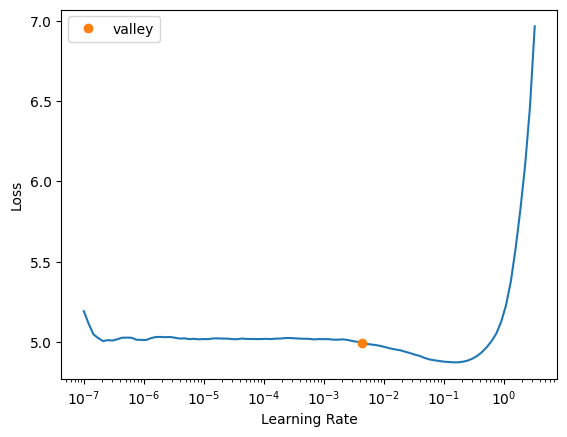

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(1,1e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.042043,3.953100,0.284669,52.096638,12:36


In [ ]:
learn.save('1epoch')

Path('models/1epoch.pth')

In [ ]:
learn.load('1epoch')
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(5,1e-2)
learn.save('NLPmodel')
learn.save_encoder('finetuned')

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.025163,3.994109,0.285664,54.277439,13:22
1,3.979201,3.933250,0.292942,51.072716,13:52
2,3.803696,3.807076,0.305675,45.018623,13:42
3,3.589874,3.696105,0.317034,40.290051,13:34
4,3.397438,3.684312,0.319286,39.817734,13:37


In [ ]:
learn.load('NLPmodel')

In [ ]:
text = 'This is terrible'
n_words=100
n_sentences=1
preds = [learn.predict(text,n_words,temperature=0.75) for _ in range(n_sentences)]

In [ ]:
print('\n'.join(preds))

This is terrible . The CD is only 8 minutes long and cheesy , and the melodies are too melodramatic . The sound is muffled , muffled , and the volume is so bad that it can only be heard in a channel where it 's at . This CD seems like you were taken at a lecture for a few days by a college instructor . i would say that the video is very good . There 's nothing about this in the book as the title says . It 's written extensively in


In [ ]:
learn.load_encoder('finetuned')

In [ ]:
df1 = pd.concat([train_df,valid_df],ignore_index=True)
df1['is_valid']=False
df1.loc[valid_df.index,'is_valid']=True
df1.head()

,Polarity,Title,Review,is_valid
0,2,Catnip for the human soul,Wonderfully entertaining! The short stories are the ideal length for passing the time while waiting at the vet's office (or doctor's office)! Well written with scripture that ties in nicely to each story. Cat lovers will easily identify with the different personalities of the feline. Great reading that leaves you feeling good!,True
1,1,Fell apart the first day I used it!!,Either way this was only $1.99 for the charger not a deal but I just went ahead and dealt with because it was so cheap!!! But just bought another one but it's a home charger might have better luck! I guess! lol But I would just reccommend the home charger instead of the car charger!,True
2,2,This is nice and wonderful,"I especially like this product. Also for a change since the manufacturer has a mail in rebate on this, I got this item (3 in fact) for free.- Koustubh, NY",True
3,1,the best available products to kill bad mouth,"this products are very effective, killing bad mouth in just second. whenever you are ready for an interview or a conversation, do not forget to take one",True
4,2,Great Stuff,This is a great portable mouthwash! I bought it for my girls in mind (they both have braces) and I like it too.,True


In [ ]:
dls_clas = TextDataLoaders.from_df(df1,text_col=2,label_col=0,text_vocab=dls.vocab)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
learn_class = text_classifier_learner(dls_clas,AWD_LSTM,drop_mult=0.5,metrics=accuracy).to_fp16()

In [ ]:
learn_class = learn.load_encoder('finetuned')

SuggestedLRs(valley=0.00363078061491251)

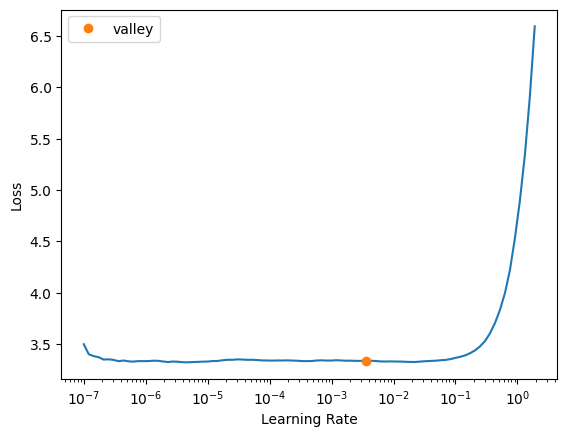

In [ ]:
learn_class.lr_find()

In [ ]:
learn_class.fit_one_cycle(1,0.005)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.401565,3.678696,0.319480,39.594727,13:04


In [ ]:
learn_class.freeze_to(-2)
learn_class.fit_one_cycle(1,slice(0.005/2.6**4),0.005)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.507999,3.740489,0.315722,42.118603,13:09


In [ ]:
learn_class.freeze_to(-3)
learn_class.fit_one_cycle(1,slice(0.005/2.6**4),0.005)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.510767,3.749129,0.315406,42.484074,13:22


In [ ]:
learn_class.unfreeze()
learn_class.fit_one_cycle(2,slice(0.0005/2.6**4),0.0005)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.530315,3.682612,0.319782,39.750092,13:49
1,3.323696,3.692491,0.319495,40.144714,13:38


In [ ]:
learn_class.save('classification')

In [ ]:
learn_class.predict('That shirt quality was not good')

In [ ]:
learn_class.predict("I didn't really like the table, it was ugly.")

In [ ]:
learn_class.predict("The mp3 player was OK. A bit mediocre")